# Hierarchical clustering

In this notebook, we will look at Hierarchical clustering, more specific **Agglomerative clustering**. First, let us import the relevant modules and dataset.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv("Ch5_age_income_data.csv")
X = data[['age', 'income']]

Note that Agglomerative clustering is also based on a distance measure, so we need to scale the data here as well.

In [3]:
minMaxScaler = MinMaxScaler()
X_scaled_mm = pd.DataFrame(minMaxScaler.fit_transform(X), columns=X.columns)

We build the agglomerative clustering model the same as the K-Means model. Note that we do specify a number of clusters. This is to get some actual cluster assignments.

In [4]:
aggClustering = AgglomerativeClustering(n_clusters=3)
aggClustering.fit(X_scaled_mm)

AgglomerativeClustering(n_clusters=3)

We can also get the cluster assignments the same way:

In [5]:
data["3aggCluster"] = aggClustering.labels_
data["3aggCluster"]

0       0
1       1
2       2
3       1
4       0
       ..
8100    0
8101    0
8102    2
8103    2
8104    0
Name: 3aggCluster, Length: 8105, dtype: int64

Note, however, that we do not have centroids for Agglomerative clustering, so we do not need to plot them. Let us visualise the Agglomerative clustering for 3 clusters:

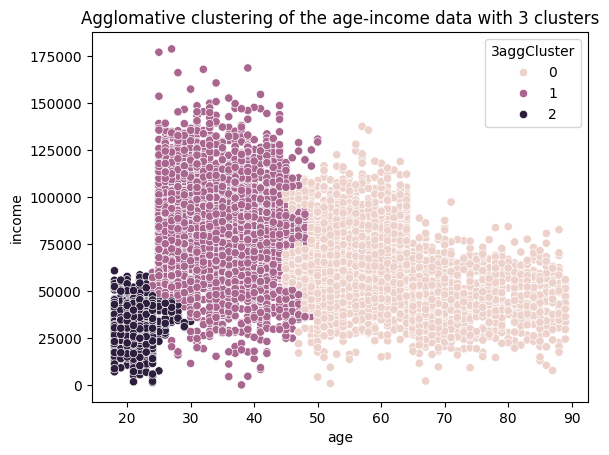

In [6]:
sns.scatterplot(data = data, x = "age", y = "income", hue = "3aggCluster")
plt.title("Agglomative clustering of the age-income data with 3 clusters")
plt.show()

Let us now try to visualize different choices of number of clusters for Agglomerative clustering, in a "bottom-up away". We first build a function that takes an `n` and plot the agglomerative clustering for `n` clusters

In [7]:
def aggClustering(n):
    agg = AgglomerativeClustering(n_clusters=n)
    agg.fit(X_scaled_mm)

    data["aggCluster{0}".format(n)] = agg.labels_

    plt.figure(figsize=(8, 6))

    sns.scatterplot(data = data, x = "age", y = "income", hue = "aggCluster{0}".format(n), palette="deep")
    plt.title("Agglomative clustering of the age-income data with {0} clusters".format(n))
    plt.show()

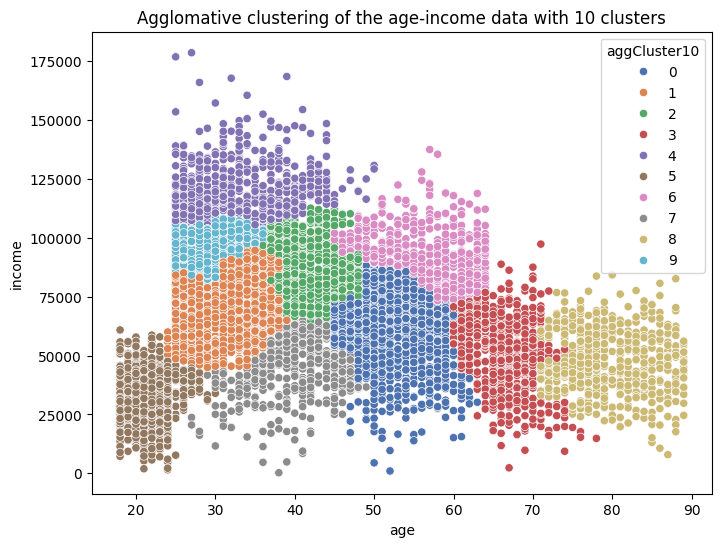

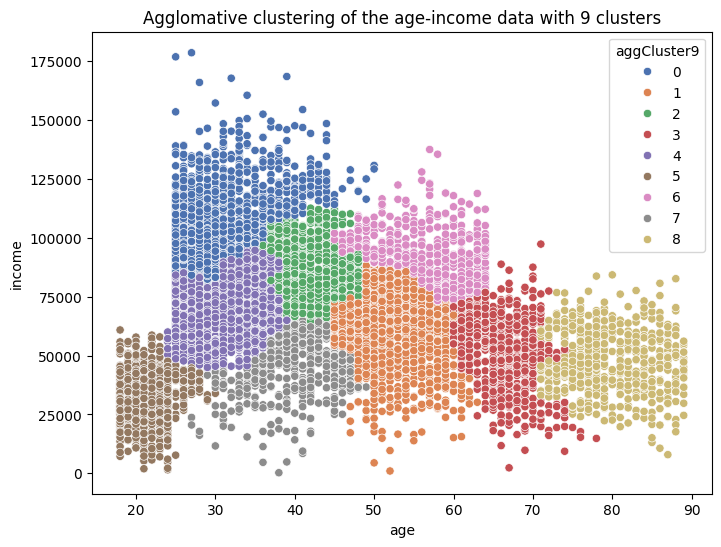

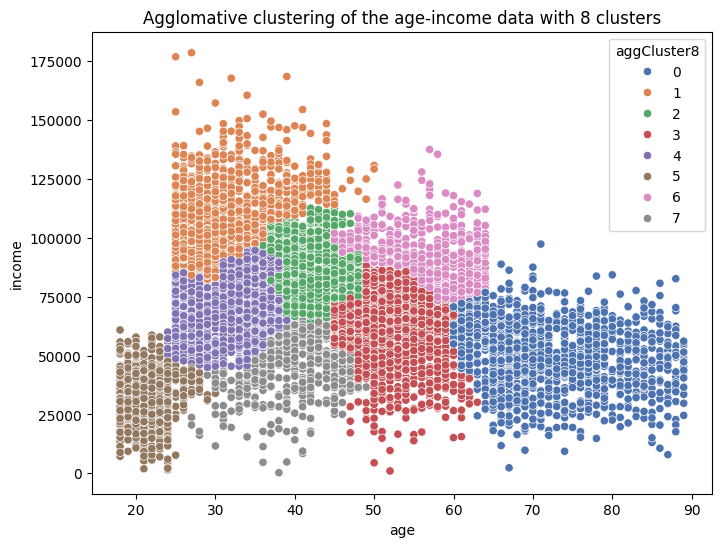

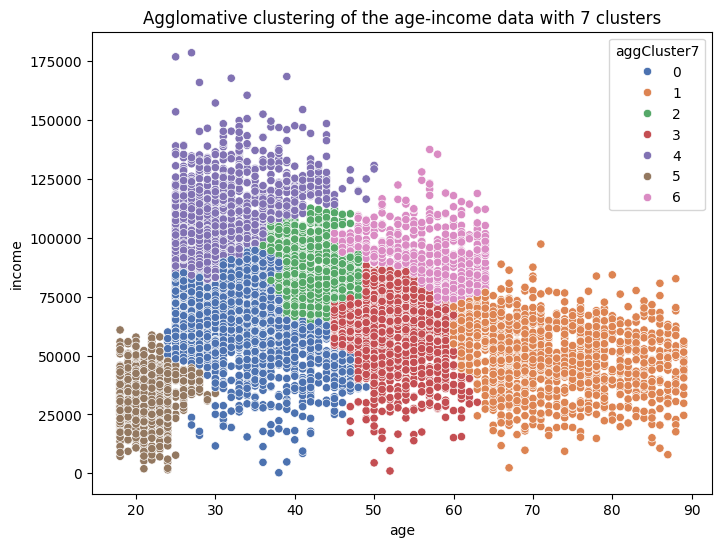

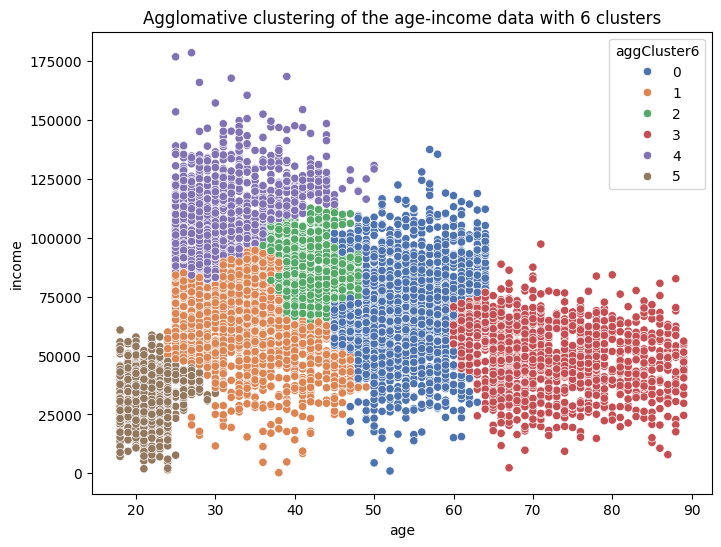

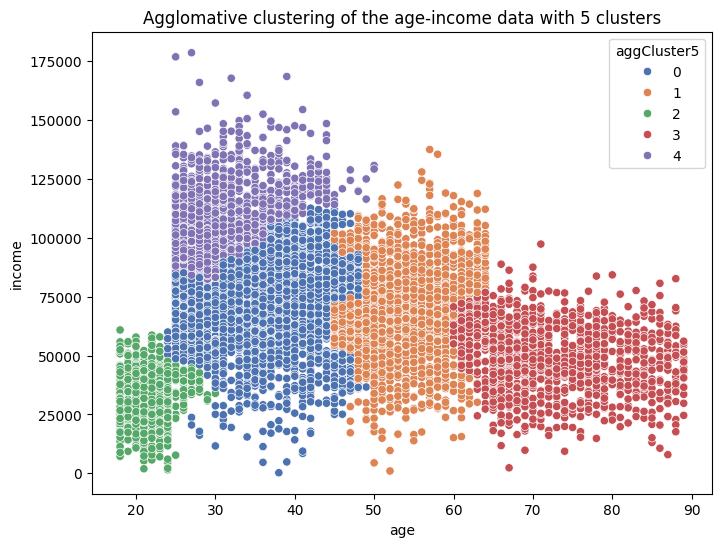

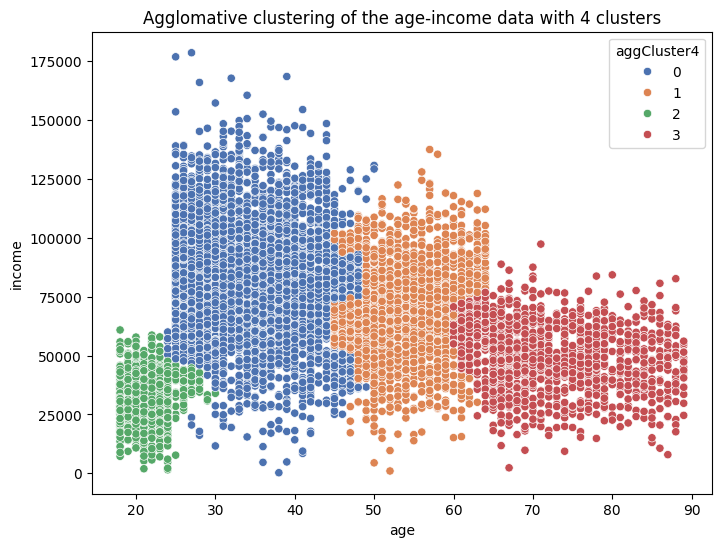

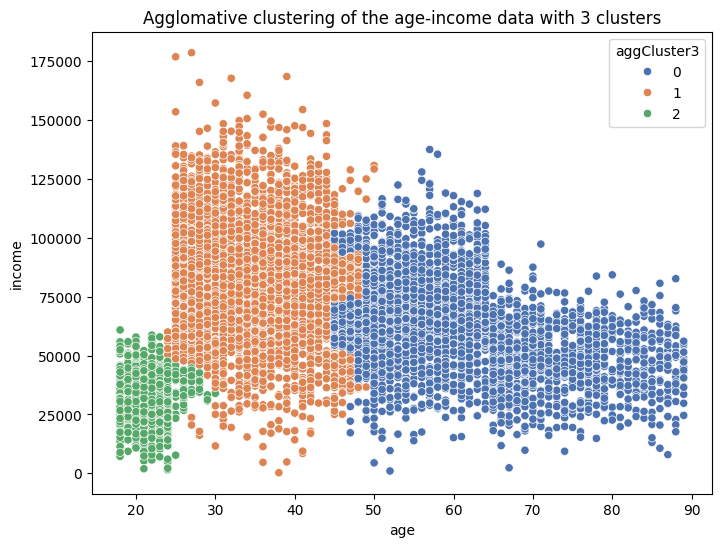

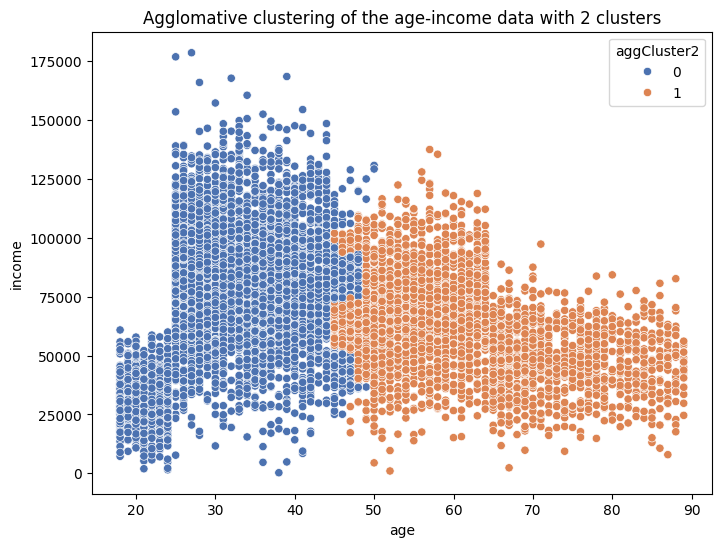

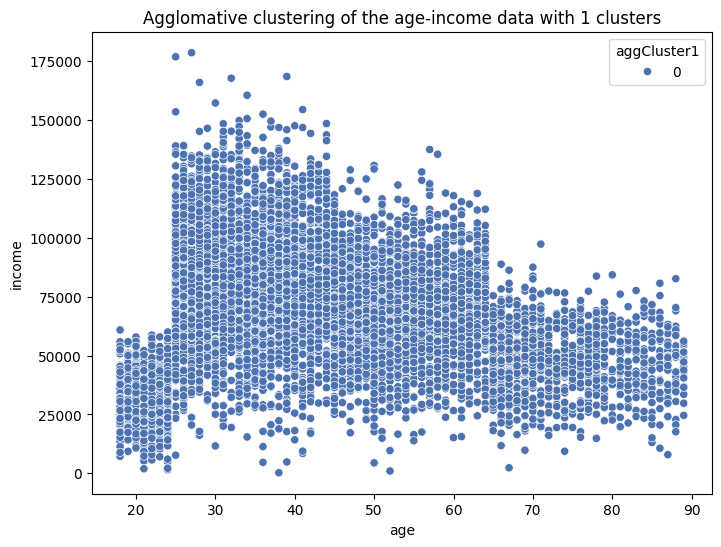

In [8]:
for cn in range(10, 0, -1):
    aggClustering(cn)

### Linkage

Note that we have not said anything about "linkage" or "Inter-Cluster Similarity". The default in `AgglomerativeClustering` is *Ward*, but it can easily be changed to *complete*, *average*, or *single*. Let us compare them for 7 clusters:

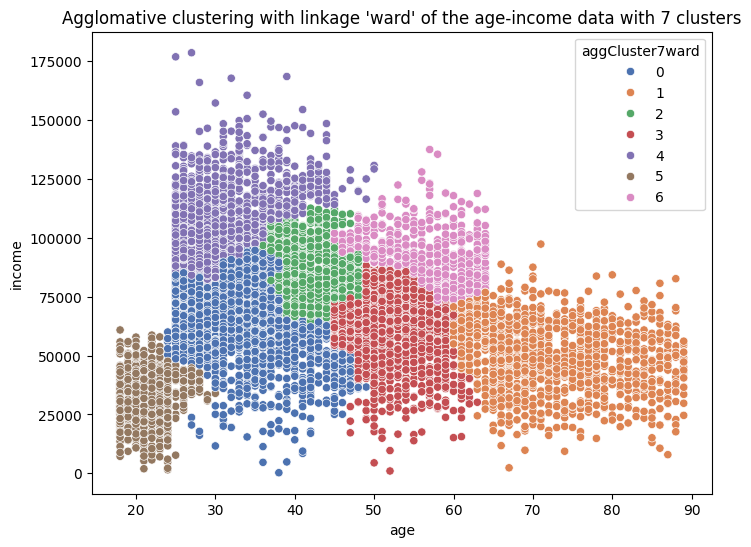

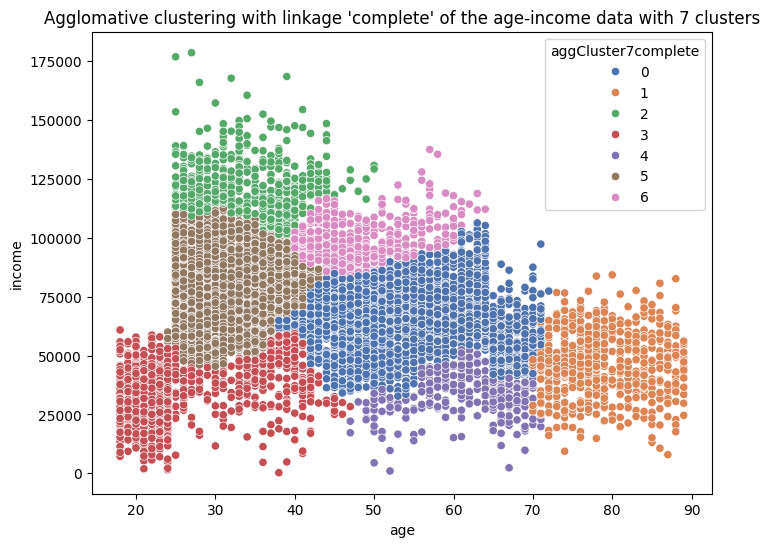

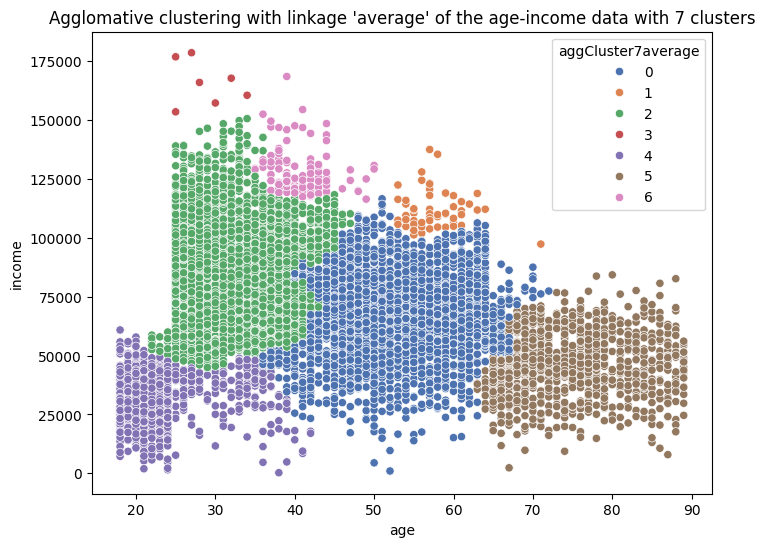

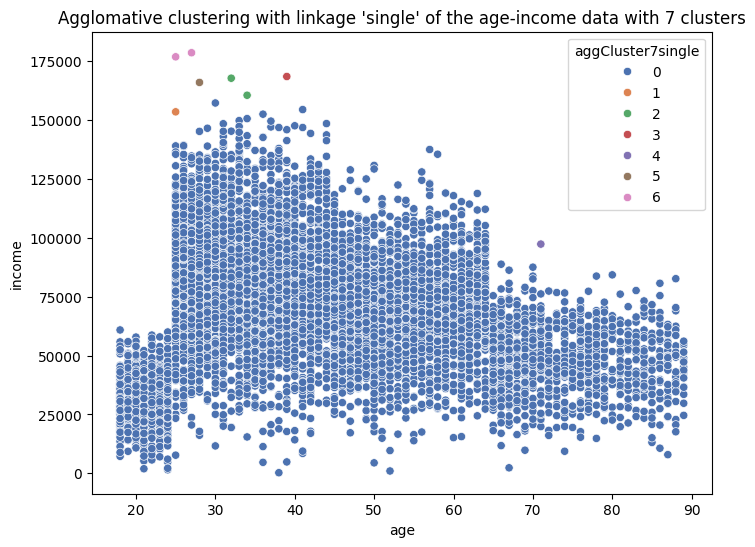

In [9]:
n=7

LinkageMethod = "ward"
agg = AgglomerativeClustering(n_clusters=n, linkage=LinkageMethod)
agg.fit(X_scaled_mm)
data["aggCluster{0}{1}".format(n, LinkageMethod)] = agg.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data = data, x = "age", y = "income", hue = "aggCluster{0}{1}".format(n, LinkageMethod), palette="deep")
plt.title("Agglomative clustering with linkage '{1}' of the age-income data with {0} clusters".format(n, LinkageMethod))
plt.show()

LinkageMethod = "complete"
agg = AgglomerativeClustering(n_clusters=n, linkage=LinkageMethod)
agg.fit(X_scaled_mm)
data["aggCluster{0}{1}".format(n, LinkageMethod)] = agg.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data = data, x = "age", y = "income", hue = "aggCluster{0}{1}".format(n, LinkageMethod), palette="deep")
plt.title("Agglomative clustering with linkage '{1}' of the age-income data with {0} clusters".format(n, LinkageMethod))
plt.show()

LinkageMethod = "average"
agg = AgglomerativeClustering(n_clusters=n, linkage=LinkageMethod)
agg.fit(X_scaled_mm)
data["aggCluster{0}{1}".format(n, LinkageMethod)] = agg.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data = data, x = "age", y = "income", hue = "aggCluster{0}{1}".format(n, LinkageMethod), palette="deep")
plt.title("Agglomative clustering with linkage '{1}' of the age-income data with {0} clusters".format(n, LinkageMethod))
plt.show()

LinkageMethod = "single"
agg = AgglomerativeClustering(n_clusters=n, linkage=LinkageMethod)
agg.fit(X_scaled_mm)
data["aggCluster{0}{1}".format(n, LinkageMethod)] = agg.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data = data, x = "age", y = "income", hue = "aggCluster{0}{1}".format(n, LinkageMethod), palette="deep")
plt.title("Agglomative clustering with linkage '{1}' of the age-income data with {0} clusters".format(n, LinkageMethod))
plt.show()

### Dendrogram
 
Let us now see show how to generate Dendrograms, and how to decide the number of clusters from a Dendrogram. 

In the script below, we import the hierarchy class of the scipy.cluster library as shc. The hierarchy class has a dendrogram method which takes the value returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters.

In [10]:
import scipy.cluster.hierarchy as shc

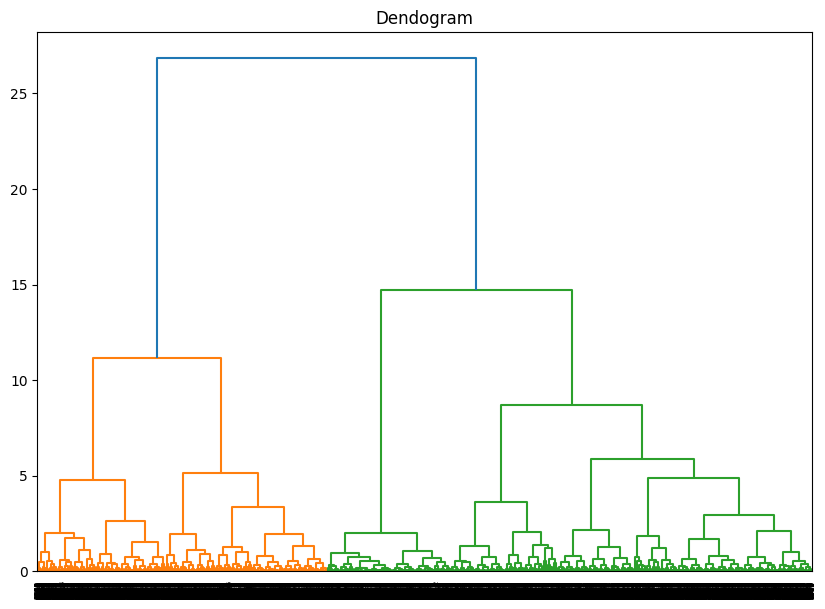

In [11]:
plt.figure(figsize=(10, 7))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(X_scaled_mm, method='ward'))
plt.show()

We can add a horizontal line to the above plot for particular y values in the following way:

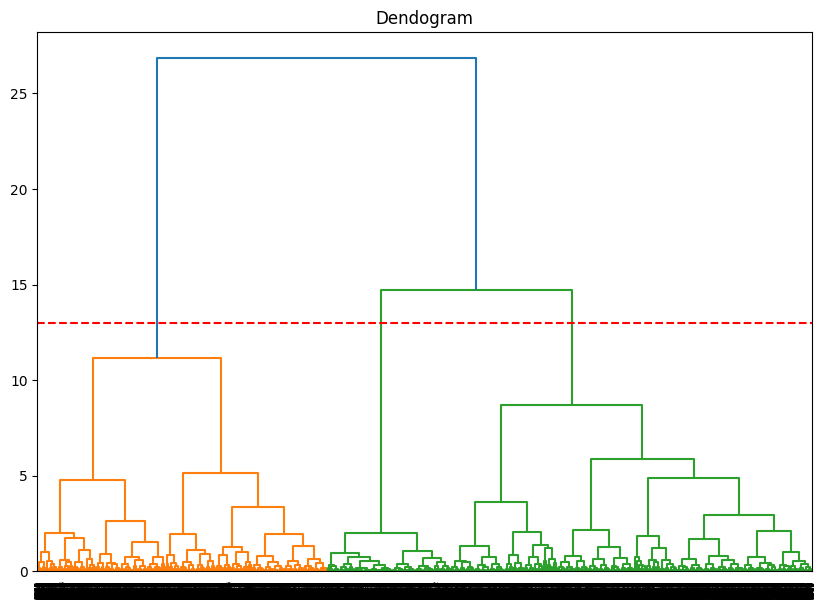

In [12]:
plt.figure(figsize=(10, 7))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(X_scaled_mm, method='ward'))

plt.axhline(y=13, color='r', linestyle='--')

plt.show()